# Multi-layer Perceptron for Diabetes Prediction

In [216]:

# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [217]:
df_diabetes = pd.read_csv("E:\VStudio\diabetes\diabetes_prepo.csv")

# Exact the feature names and label names
feature_names = df_diabetes.drop(["Outcome"], axis = 1)
print("feature names: ", feature_names.columns)

label_names= df_diabetes["Outcome"].copy()
print("label names:\n", label_names.value_counts())

# Print infomation about the data
display(df_diabetes.head())
df_diabetes.info()
display(df_diabetes.describe().T)
#allign the outcome column to the original dataset, which will make the accuracy higher
df_diabetes['Outcome'] = df_diabetes['Outcome'].replace(1, 0)
df_diabetes['Outcome'] = df_diabetes['Outcome'].replace(-1, 1)

feature names:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
label names:
 Outcome
 1    500
-1    268
Name: count, dtype: int64


,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Outcome,768.0,0.302083,0.953903,-1.0,-1.000000,1.000000,1.000000,1.0
Pregnancies,768.0,-0.547641,0.396421,-1.0,-0.882353,-0.647059,-0.294118,1.0
Glucose,768.0,0.215020,0.321333,-1.0,-0.005025,0.175879,0.409547,1.0
BloodPressure,768.0,0.131574,0.319896,-1.0,0.016393,0.180328,0.311475,1.0
SkinThickness,768.0,-0.585122,0.322267,-1.0,-1.000000,-0.535354,-0.353535,1.0
Insulin,768.0,-0.810410,0.273036,-1.0,-1.000000,-0.919622,-0.696809,1.0
BMI,768.0,-0.047279,0.237041,-1.0,-0.186289,-0.046200,0.090909,1.0
DiabetesPedigreeFunction,768.0,-0.662247,0.284229,-1.0,-0.858241,-0.746798,-0.530743,1.0
Age,759.0,-0.599166,0.388652,-1.0,-0.900000,-0.733333,-0.366667,1.0


e:\VStudio\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\VStudio\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\VStudio\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


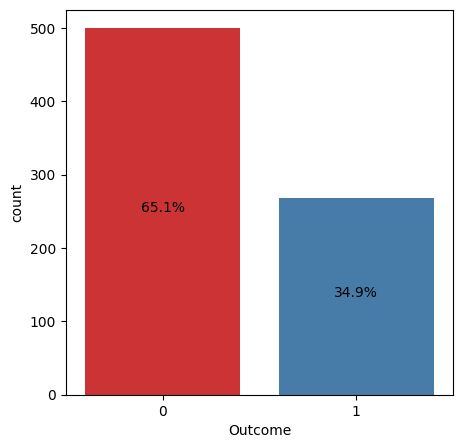

In [218]:
# Graphically show the proportions of the labels in the whole dataset
plt.figure(figsize=(5, 5))
total = float(len(df_diabetes))
ax = sns.countplot(x="Outcome", data=df_diabetes, palette="Set1")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.annotate(percentage, (x, y), ha="center")



In [219]:
# Count number of zeros in all columns of Dataframe
for column_name in df_diabetes.columns:
    column = df_diabetes[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Outcome  is :  500
Count of zeros in column  Pregnancies  is :  0
Count of zeros in column  Glucose  is :  0
Count of zeros in column  BloodPressure  is :  0
Count of zeros in column  SkinThickness  is :  0
Count of zeros in column  Insulin  is :  0
Count of zeros in column  BMI  is :  0
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0


In [220]:
# In the preprocessed data, obervation of 0 in features has been replaced
df_diabetes.isnull().sum()

df_diabetes['Age'].fillna(df_diabetes['Age'].median(), inplace = True)


In [221]:
# Splitting the data
X = df_diabetes.drop(['Outcome'], axis = 1)
y = df_diabetes['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [222]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [223]:
class MLP(nn.Module):
    def __init__(self, n_neurons=8):
        super().__init__()
        self.layer = nn.Linear(8, n_neurons)
        self.act = nn.ReLU()
        self.output = nn.Linear(n_neurons, 1)
        self.prob = nn.Sigmoid()
            
    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x
# Create the model instance
model = MLP()


In [224]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values.astype(float)).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values.astype(float)).view(-1, 1)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
for epoch in range(100):  # 100 epochs
    for data, targets in train_loader:
        # Forward pass
        scores = model(data)
        
        # Print scores statistics
        print("Scores min:", scores.min().item())
        print("Scores max:", scores.max().item())
        print("Sample scores values:", scores[:10].squeeze().tolist())

        loss = criterion(scores, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


Scores min: 0.34838205575942993
Scores max: 0.7610027194023132
Sample scores values: [0.4605608880519867, 0.4253503382205963, 0.5701910853385925, 0.38903293013572693, 0.4324641823768616, 0.4104747474193573, 0.39685267210006714, 0.42417043447494507, 0.36574625968933105, 0.3913446366786957]
Scores min: 0.33010542392730713
Scores max: 0.7084652185440063
Sample scores values: [0.3918912708759308, 0.4010735750198364, 0.40765178203582764, 0.7084652185440063, 0.41936683654785156, 0.5585341453552246, 0.4210878014564514, 0.4335992634296417, 0.4501795470714569, 0.4418871998786926]
Scores min: 0.3418111205101013
Scores max: 0.7592711448669434
Sample scores values: [0.4194175601005554, 0.4115477502346039, 0.4876689314842224, 0.4370238482952118, 0.3990166187286377, 0.3928263783454895, 0.46139368414878845, 0.4174150824546814, 0.4099128246307373, 0.40101391077041626]
Scores min: 0.3431275486946106
Scores max: 0.6668428778648376
Sample scores values: [0.43764856457710266, 0.4561682343482971, 0.4391715

Scores min: 0.3365333378314972
Scores max: 0.6709421277046204
Sample scores values: [0.39181360602378845, 0.41987478733062744, 0.45802685618400574, 0.4087654650211334, 0.437703013420105, 0.6709421277046204, 0.359697550535202, 0.42169618606567383, 0.44888007640838623, 0.5137863755226135]
Scores min: 0.34290388226509094
Scores max: 0.7613176703453064
Sample scores values: [0.4447261691093445, 0.42403241991996765, 0.5619456171989441, 0.4294869303703308, 0.4475851058959961, 0.4572198987007141, 0.41690343618392944, 0.4065035879611969, 0.41826778650283813, 0.4448045492172241]
Scores min: 0.33524462580680847
Scores max: 0.5867031812667847
Sample scores values: [0.4390743672847748, 0.4099315404891968, 0.46644747257232666, 0.3574744164943695, 0.37754014134407043, 0.44853895902633667, 0.44249966740608215, 0.3959627151489258, 0.513302206993103, 0.37848368287086487]
Scores min: 0.32411134243011475
Scores max: 0.6211773157119751
Sample scores values: [0.38077619671821594, 0.38226157426834106, 0.373

In [225]:
# Evaluating the model
with torch.no_grad():
    test_scores = model(X_test_tensor)
    test_predictions = (test_scores > 0.5).float()
    accuracy = (test_predictions == y_test_tensor).float().mean()

print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")


Test Accuracy: 58.33%
